In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('./datasets/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
## independent and dependent features
X = np.array(df.loc[:, df.columns != 'output'])
Y = np.array(df['output'])
print(X.shape, Y.shape)

(303, 13) (303,)


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
## scaling the data for better performance
## StandardScaler is used to scale the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
print(X_train_scaled[0].shape, X_train_scaled[0])

(13,) [-1.35679832  0.72250438  0.00809909 -0.61685555  0.91403366 -0.38330071
  0.8431327   0.53278078 -0.67663234 -0.92086403  0.95390513 -0.68970073
 -0.50904773]


In [41]:
class ANN:
    def __init__(self, LR, X_train, y_train, X_test, y_test):
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.L_train = []
        self.L_test = []
        
    def activation(self, x):
        # sigmoid in our case
        return 1 / (1 + np.exp(-x))

    def dactivation(self, x):
        # derivative of sigmoid
        return self.activation(x) * (1 - self.activation(x))

    def forward(self, X):
        hidden_1 = np.dot(X, self.w) + self.b
        activate_1 = self.activation(hidden_1)
        return activate_1

    def backward(self, X, y_true):
        # calc gradients
        hidden_1 = np.dot(X, self.w) + self.b
        y_pred = self.forward(X)
        dL_dpred = 2 * (y_pred - y_true)
        dpred_dhidden1 = self.dactivation(hidden_1)
        dhidden1_db = 1
        dhidden1_dw = X

        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw
        return dL_db, dL_dw

    def optimizer(self, dL_db, dL_dw):
        # update weights
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR

    def train(self, ITERATIONS):
        for i in range(ITERATIONS):
            # random position
            random_pos = np.random.randint(len(self.X_train))
            
            # forward pass
            y_train_true = self.y_train[random_pos]
            y_train_pred = self.forward(self.X_train[random_pos])
            
            # calc training loss
            L = np.sum(np.square(y_train_pred - y_train_true))
            self.L_train.append(L)
            
            # calc gradients
            dL_db, dL_dw = self.backward(
                self.X_train[random_pos], self.y_train[random_pos]
            )
            # update weights
            self.optimizer(dL_db, dL_dw)

            # calc error at every epoch end
            L_sum = 0
            for j in range(len(self.X_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.X_test[j])
                L_sum += np.square(y_pred - y_true)
            self.L_test.append(L_sum)

        return "training done"



In [49]:
## hyperparameters
LR = 0.1
epochs = 1000

In [50]:
ann = ANN(LR, X_train_scaled, Y_train, X_test_scaled, Y_test)
ann.train(epochs)

'training done'

<Axes: >

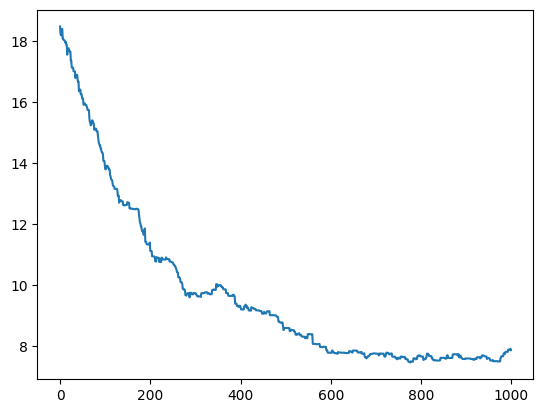

In [51]:
## check losses
sns.lineplot(x=list(range(len(ann.L_test))), y=ann.L_test)

In [52]:
## use on test data
total = X_test_scaled.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = Y_test[i]
    y_pred = np.round(ann.forward(X_test_scaled[i]))
    y_preds.append(y_pred)
    correct+=1 if y_true == y_pred else 0

In [53]:
##accutacy
correct/total

0.8524590163934426

In [54]:
from collections import Counter
Counter(Y_test)

Counter({np.int64(1): 32, np.int64(0): 29})

In [55]:
confusion_matrix(y_true=Y_test, y_pred=y_preds)

array([[26,  3],
       [ 6, 26]])